In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,KFold,ShuffleSplit,StratifiedShuffleSplit,cross_validate
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,11-02-2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,22-04-2016 02:07,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,01-02-2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24-03-2016 02:35,0


In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0


In [5]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
target=df[['Clicked on Ad']]
features=df.drop(columns=['Ad Topic Line','City','Timestamp','Country','Clicked on Ad'])

In [8]:
features.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


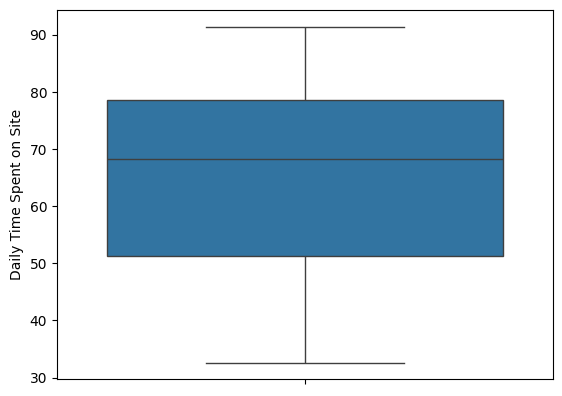

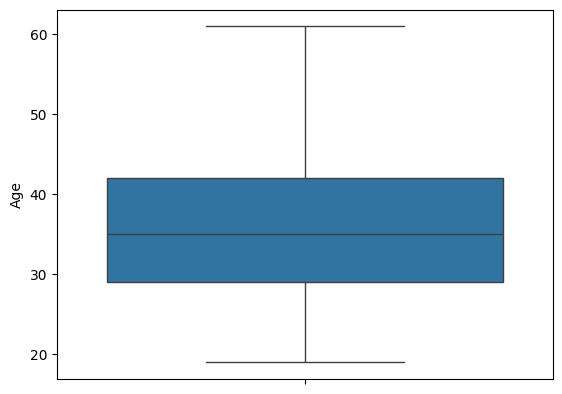

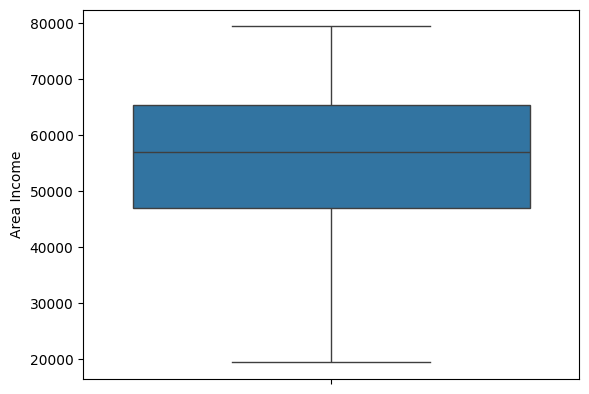

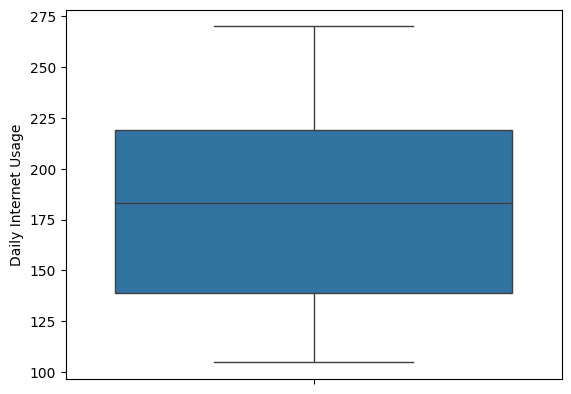

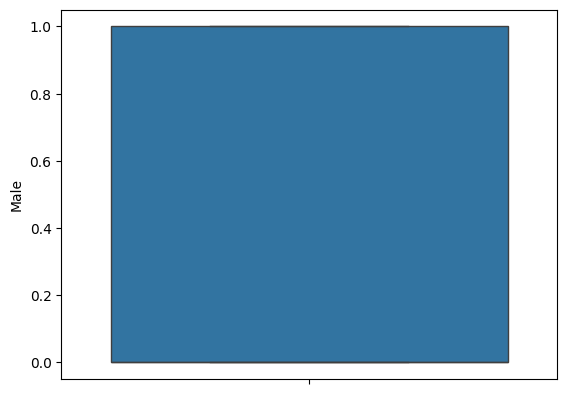

In [9]:
def outlier_capping(df,columns):
    Q1= df[columns].quantile(0.25)
    Q3= df[columns].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[columns]= df[columns].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in features.select_dtypes(include=['int','float']).columns:
    outlier_capping(features,col)
for col in features.columns:
    sns.boxplot(data=features,y=col)
    plt.show()

In [10]:
from sklearn.feature_selection import f_classif

In [11]:
f_clas=f_classif(features,target)
f_clas

(array([1.26852516e+03, 3.19643165e+02, 2.93805758e+02, 1.61897646e+03,
        1.44528599e+00]),
 array([5.87738424e-180, 3.12980831e-062, 6.32558720e-058, 3.89323412e-211,
        2.29571032e-001]))

<Axes: >

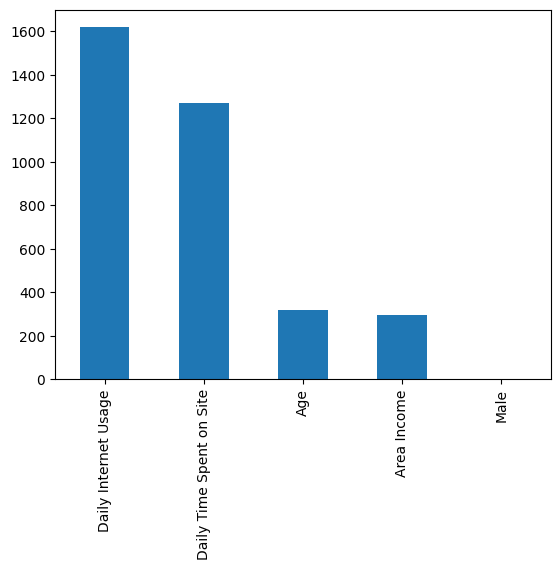

In [12]:
pd.Series(f_clas[0],index=features.columns).sort_values(ascending=False).plot(kind='bar')

In [13]:
features.drop(columns=['Male'],inplace=True)

In [14]:
features.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,68.95,35,61833.90,256.09
1,80.23,31,68441.85,193.77
2,69.47,26,59785.94,236.50
3,74.15,29,54806.18,245.89
4,68.37,35,73889.99,225.58


In [15]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 4)
(200, 4)
(800, 1)
(200, 1)


In [16]:
std_sca=StandardScaler()
x_train=pd.DataFrame(std_sca.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(std_sca.transform(x_test),columns=x_test.columns)

In [17]:
x_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
0,1.107319,0.228077,0.795798,1.038124
1,-0.848223,2.618398,-0.937556,-0.487133
2,0.666695,0.000427,1.375580,-0.471576
3,1.662016,0.341901,-0.592776,0.687637
4,1.437630,-0.227223,-0.229225,-0.614104
...,...,...,...,...
795,-0.880189,-1.365471,0.604192,0.241522
796,0.744415,-1.023997,0.060052,1.283144
797,-0.113015,-0.227223,0.616808,1.717821
798,-0.523553,-1.137822,1.042054,0.563183


In [18]:
log_mode=LogisticRegression()
log_mode.fit(x_train,y_train)

LogisticRegression()

In [19]:
y_prid=log_mode.predict(x_train)
accuracy_score(y_train,y_prid)

0.97

In [20]:
y_prid1=log_mode.predict(x_test)
accuracy_score(y_test,y_prid1)

0.97

In [21]:
y_prid=log_mode.predict(x_train)
print('Training_score:',accuracy_score(y_train,y_prid))
y_prid1=log_mode.predict(x_test)
print('Testing_score:',accuracy_score(y_test,y_prid1))

Training_score: 0.97
Testing_score: 0.97


In [22]:
shuffle=ShuffleSplit(n_splits=10,test_size=0.2,random_state=50)

In [23]:
shuffle.split(features,target)

<generator object BaseShuffleSplit.split at 0x000001957FB63340>

In [24]:
for train_split,test_split in shuffle.split(features,target):
    print(train_split,test_split)

[886 488 265 112 650 577 280 571 629 158 668 869 983 944 715 232 146 558
 586 356 482 126 213 315 481 293 573 491 806 648  43 286 728 861 370 407
 722 423  18 588   9 339 484 124 713 880 862 366 483 255 651 492 210 220
 458 719 479  25 696 188 535 192 379 279 305 159  35 599 879 560 626 191
 443 382 203 955 845 943 591 267 162 274 527 916 672 816 689 679 508 569
 270 598 982 538 206 472 115  42 383 257 788 579 554 882  44   8 494 935
 914 111 374 513 814 216 627 553 739 940 180 589 246 897 408 829 761 399
 108 770 855  87 345 323 168 758 110 638  94 945 828 902 503 789 259  23
 600  85 532 628 114 608 319 611 347 542  34 120 913 537 714 473 870 172
 999 337 100 442 353 653 496 195 746 227 468 201 287 500 718 821 470 805
  52 445  54 667  81 737 885 568 766 942 708 454 546 137 179 961 645 467
 273 143 151 624 849 354 485 175 534 691 317  24 670  80 294 682 324 145
 853 971 641 927 103 329 593 249 911 793 149 637  65 212 282 350 390 150
 214 890   1 424 973 734 977 803 295 767  14 204 18

In [25]:
cross=cross_validate (LogisticRegression(),features,target,scoring=['accuracy'],cv=shuffle,return_train_score=True)

In [26]:
train_accuracy=cross['train_accuracy'].mean().round(2)
train_accuracy

np.float64(0.95)

In [27]:
test_accuracy=cross['test_accuracy'].mean().round(2)
test_accuracy

np.float64(0.94)

In [28]:
train_accuracy=cross['train_accuracy'].mean().round(2)
test_accuracy=cross['test_accuracy'].mean().round(2)
print('Train_acc:',train_accuracy,',','Test_acc:',test_accuracy)

Train_acc: 0.95 , Test_acc: 0.94


In [29]:
str_shuffle=StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=50)

In [30]:
cross=cross_validate (LogisticRegression(),features,target,scoring=['accuracy'],cv=str_shuffle,return_train_score=True)

In [31]:
train_accuracy=cross['train_accuracy'].mean().round(2)
test_accuracy=cross['test_accuracy'].mean().round(2)
print('Train_acc:',train_accuracy,',','Test_acc:',test_accuracy)

Train_acc: 0.94 , Test_acc: 0.94


In [32]:
kfold=KFold(n_splits=10,shuffle=True,random_state=50)

In [33]:
cross=cross_validate (LogisticRegression(),features,target,scoring=['accuracy'],cv=kfold,return_train_score=True)

In [34]:
train_accuracy=cross['train_accuracy'].mean().round(2)
test_accuracy=cross['test_accuracy'].mean().round(2)
print('Train_acc:',train_accuracy,',','Test_acc:',test_accuracy)

Train_acc: 0.96 , Test_acc: 0.96


In [35]:
## take randomely kfold because cv=5 (give number)
cross=cross_validate (LogisticRegression(),features,target,scoring=['accuracy'],cv=5,return_train_score=True)
train_accuracy=cross['train_accuracy'].mean().round(2)
test_accuracy=cross['test_accuracy'].mean().round(2)
print('Train_acc:',train_accuracy,',','Test_acc:',test_accuracy)

Train_acc: 0.95 , Test_acc: 0.95


In [36]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100,stratify=df['Clicked on Ad'])
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 4)
(200, 4)
(800, 1)
(200, 1)


In [37]:
std_sca=StandardScaler()
x_train=pd.DataFrame(std_sca.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(std_sca.transform(x_test),columns=x_test.columns)

log_mode=LogisticRegression()
log_mode.fit(x_train,y_train)

LogisticRegression()

In [38]:
log_cv=LogisticRegressionCV(cv=5)

log_cv.fit(x_train,y_train)
y_prid=log_cv.predict(x_test)
accuracy_score(y_test,y_prid)

0.975

In [39]:
log_cv=LogisticRegressionCV(cv=str_shuffle)

log_cv.fit(x_train,y_train)
y_prid=log_cv.predict(x_test)
accuracy_score(y_test,y_prid)

0.975